# Model Training

#### Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Modelling Dependencies
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.metrics import mean_squared_error,r2_score , mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### Dataset

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Data Science\MLOPS\notebook\data\stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### Problem statement
- We are going to take all the features as input and we'll try to predict the output mat_score feature

Preparing X and Y Variable

In [5]:
X = df.drop('math_score',axis = 1)
Y = df['math_score']
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

#### Column Transformer
- Creating columns transformer for 3 types of transforms

# Unique Values for the columns

In [11]:
for cols in df.columns:
    if(df[cols].dtypes == 'str'):
        print(f"{cols} : {df[cols].unique()}")

gender : <StringArray>
['female', 'male']
Length: 2, dtype: str
race_ethnicity : <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
parental_level_of_education : <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
lunch : <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
test_preparation_course : <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [13]:
num_features = X.select_dtypes(exclude=['object','str']).columns
cat_features = X.select_dtypes(include = ['object','str']).columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop = 'first',sparse_output=False)

preprocessor = ColumnTransformer([('OneHotEncoder',ohe_transformer,cat_features),('StandardScaling',numeric_transformer,num_features)],remainder='passthrough')
X = preprocessor.fit_transform(X)
transformed_features = pd.DataFrame(X,columns = preprocessor.get_feature_names_out())
X
                        

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 14))

In [14]:
X.shape

(1000, 14)

In [15]:
transformed_features

,OneHotEncoder__gender_male,OneHotEncoder__race_ethnicity_group B,OneHotEncoder__race_ethnicity_group C,OneHotEncoder__race_ethnicity_group D,OneHotEncoder__race_ethnicity_group E,OneHotEncoder__parental_level_of_education_bachelor's degree,OneHotEncoder__parental_level_of_education_high school,OneHotEncoder__parental_level_of_education_master's degree,OneHotEncoder__parental_level_of_education_some college,OneHotEncoder__parental_level_of_education_some high school,OneHotEncoder__lunch_standard,OneHotEncoder__test_preparation_course_none,StandardScaling__reading_score,StandardScaling__writing_score
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.193999,0.391492
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.427476,1.313269
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.770109,1.642475
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.833899,-1.583744
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.044215,1.774157
996,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.970952,-0.859491
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.125472,-0.201079
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.605158,0.589015


### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape , X_test.shape

((800, 14), (200, 14))

#### Create an Evaluation Function to give all metrics after model Training 

In [17]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    score = r2_score(true,predicted)
    
    return mae , mse , rmse , score

# Models

In [21]:
models = {
    "LinearRegression":LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "ElasticNet" : ElasticNet(),
    "SVR" : SVR(),
    "KNN" : KNeighborsRegressor(),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest" : RandomForestRegressor(),
    "AdaBoost" : AdaBoostRegressor(),
    "CatBoost" : CatBoostRegressor(),
    "Xgboost" : XGBRegressor() 
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train , Y_train)
    
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    train_mae , train_mse , train_rmse , train_score = evaluate_model(Y_train , Y_pred_train)
    test_mae , test_mse , test_rmse , test_score = evaluate_model(Y_train , Y_pred_train)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_score))
    r2_list.append(test_score)

    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3235
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3235
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071


ElasticNet
Model performance for Training set
- Root Mean Squared Error: 8.1589
- Mean Absolute Error: 6.4950
- R2 Score: 0.7047
----------------------------------


In [25]:
print(list(zip(model_list,r2_list)))

[('LinearRegression', 0.8743172040139593), ('Ridge', 0.8742958408729106), ('Lasso', 0.8071462015863458), ('ElasticNet', 0.704732380051486), ('SVR', 0.7981779427964686), ('KNN', 0.8624917023532732), ('DecisionTree', 0.9996534669718089), ('RandomForest', 0.9771851675879814), ('AdaBoost', 0.8543158552159321), ('CatBoost', 0.9575088961836384), ('Xgboost', 0.9951009154319763)]


In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,DecisionTree,0.999653
10,Xgboost,0.995101
7,RandomForest,0.977185
9,CatBoost,0.957509
0,LinearRegression,0.874317
1,Ridge,0.874296
5,KNN,0.862492
8,AdaBoost,0.854316
2,Lasso,0.807146
4,SVR,0.798178


## Linear Regression

In [26]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

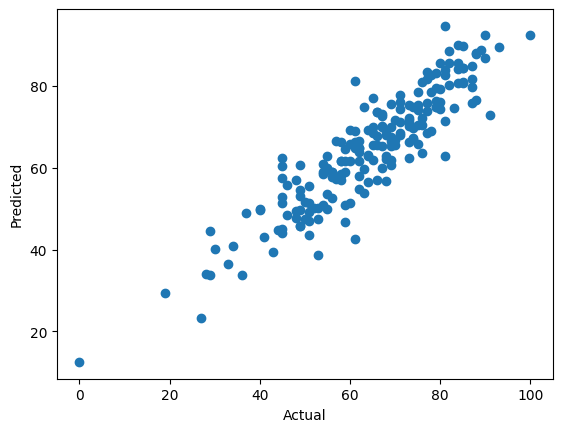

In [27]:
plt.scatter(Y_test,Y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

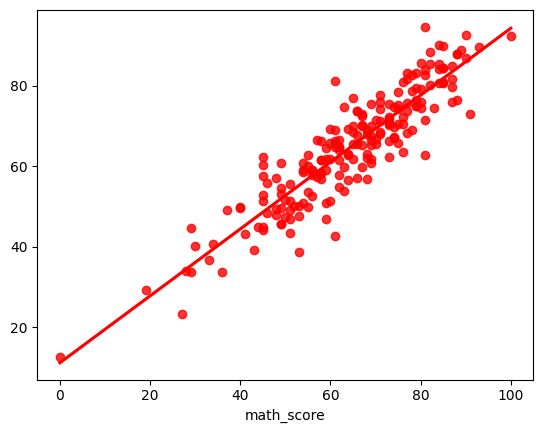

In [ ]:
sns.regplot(x=Y_test,y=Y_pred_test,ci=None,color ='red')

#### Difference between Actual and Predicted Values

In [31]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


In [ ]:
# This is the form of Modular code--> Now we will map the code for which part of code will come where in the folder and all
# For example we will create the def evaulation_model function in the ultis.py and then we will call it form the data injection file and etc.